In [42]:
import distribution_generator as dg
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def sampleGenTest():
    sample = [lognormvariate(1, 1) for i in range(3000)]
    den = calcPropobilityDensity(sample, 1)
    sample2 = sampleFromDensity(den)
    den2 = calcPropobilityDensity(sample2, 1)
    plt.plot(den)
    plt.plot(den2)
    #plt.plot(np.sort(sample))
    #plt.plot(np.sort(sample2))
    plt.show()
    
    

#put cass
#watch i TLB misses
#
#compare zing and dolphin

In [10]:
def runGenerator(config):
    RG = dg.RequestGenerator(throughput = config['throughput'],
                             end_time = config['duration'],
                             computation_difficulty = config['computational_dificulty'],
                             HEAP_usage = config['HEAP_usage'],
                             memory_size = config['memory_size'],
                             memory_treated = config['memory_treated']
                            )
    RP = dg.RequestProcessor(cores_number = config['cores_number'],
                            request_list = RG.getRequestList(),
                            HEAP = config['HEAP_size'],
                            memory_size = config['memory_size'],
                            cores_computation_error_sigma = config['computation_error_sigma'],
                            GC_time_coefficient = config['GC_time_coefficient'])
    RP.processRequests(RG.getRequestList())

    times = []
    for request in RP.getProcessedRequestList():
        times.append(request.getWorkTime())
    
    return times

In [11]:
def readConfig():
    filename = 'simulator_config.conf.txt'
    config_df = pd.read_table(filename, sep = ':',
                           skipinitialspace = True, header = None, names = ['params', 'vals'])
    config = dict(zip(config_df.params, list(map(int, config_df.vals))))
    return config
    

In [17]:
def plotDensity(densities, log_flag = False, height = 4, width = 12, left = None, right = None, axes_limits = None,
               colors = None, name = None):
    
    if type(densities[0]) != list and type(densities[0]) != np.ndarray:
        densities = [densities]
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(1,1,1)

    if axes_limits:
        ax.axis(axes_limits)
        ax = plt.gca()
        ax.set_autoscale_on(False)

    if left is None:
        left = 0
    if right is None:
        right = len(densities[0])
        
    for i in range(len(densities)):
        density = densities[i]
        if colors is None:
            ax.plot(density[left : right])
        else:
            ax.plot(density[left : right], colors[i])
   
    if not name is None: 
        fig.savefig(name)
    if log_flag:
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.show()

In [18]:
def densityFromSample(sample, normed = True):
    return np.histogram(sample, bins=round(max(sample) + 1) , 
                        density=True, range = (0, round(max(sample) +1)))

In [12]:
#good params
#RG = RequestGenerator(throughput = 10000, end_time = 1, computation_difficulty = 250, HEAP_usage = 1)
#RP = RequestProcessor(10, RG.getRequestList())
config1 = {'throughput' : 10000,
          'duration' : 1,
          'computational_dificulty': 100,
          'HEAP_usage': 10,
          'memory_treated': 10,
          'computation_error_sigma': 10,
          'HEAP_size': 4000,
          'memory_size': 100,
          'cores_number': 100,
          'GC_start_percentage': 0.9,
          'GC_stop_percentage': 0.0,
          'GC_time_coefficient': 1,}

config2 = {'throughput' : 10000,
          'duration' : 1,
          'computational_dificulty': 100,
          'HEAP_usage': 10,
          'memory_treated': 11,
          'computation_error_sigma': 10,
          'HEAP_size': 4000,
          'memory_size': 100,
          'cores_number': 100,
          'GC_start_percentage': 0.9,
          'GC_stop_percentage': 0.0,
          'GC_time_coefficient': 1,}
#config = readConfig()



In [16]:
times1 = runGenerator(config1)
times2 = runGenerator(config1)
times3 = runGenerator(config2)

print(stats.mstats.ks_twosamp(times1, times2))
print(stats.mstats.ks_twosamp(times1, times3))

(0.009999999999999995, 0.69937419913101617)
(0.016499999999999956, 0.13138325901602502)


In [33]:
plotDensity(densityFromSample(times3)[0])

In [29]:
plotDensity(times3[0:1000])

In [40]:
config3 = {'throughput' : 10000,
          'duration' : 1,
          'computational_dificulty': 100,
          'HEAP_usage': 10,
          'memory_treated': 11,
          'computation_error_sigma': 10,
          'HEAP_size': 4000,
          'memory_size': 100,
          'cores_number': 10,
          'GC_start_percentage': 0.9,
          'GC_stop_percentage': 0.,
          'GC_time_coefficient': 0.5,}

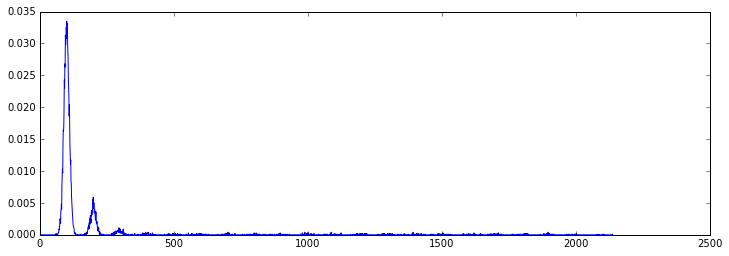

In [43]:
plotDensity(densityFromSample(runGenerator(config3))[0])

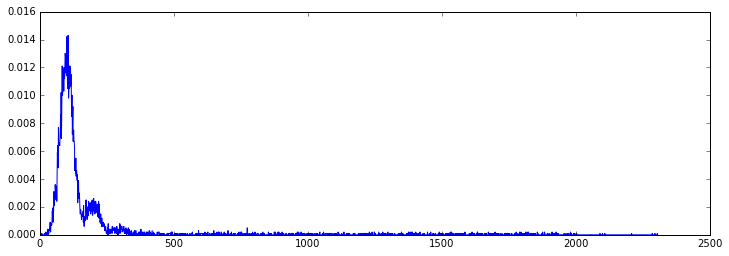

In [47]:
config4 = {'throughput' : 10000,
          'duration' : 1,
          'computational_dificulty': 100,
          'HEAP_usage': 10,
          'memory_treated': 13,
          'computation_error_sigma': 25,
          'HEAP_size': 4000,
          'memory_size': 100,
          'cores_number': 10,
          'GC_start_percentage': 0.9,
          'GC_stop_percentage': 0,
          'GC_time_coefficient': 0.5,}

plotDensity(densityFromSample(runGenerator(config4))[0])

In [50]:
config5 = {'throughput' : 10000,
          'duration' : 100,
          'computational_dificulty': 100,
          'HEAP_usage': 10,
          'memory_treated': 13,
          'computation_error_sigma': 25,
          'HEAP_size': 4000,
          'memory_size': 100,
          'cores_number': 10,
          'GC_start_percentage': 0.9,
          'GC_stop_percentage': 0,
          'GC_time_coefficient': 0.5,}



In [51]:
times_long_1 = runGenerator(config5)

AttributeError: 'NoneType' object has no attribute 'getLeftCell'

In [ ]:
times_long_2 = runGenerator(config5)

In [ ]:
import TracyWidom

TW = TracyWidom.TracyWidom(2)
y = TW.pdf(np.linspace(-5, 5, 1000))

class DensityInstance():
    def __init__(self, density_y, density_x = None):
        self.density_y = np.array(density_y)
        if density_x:
            self.density_x = np.array(density_x)
        else:
            self.density_x = np.linspace(0, len(density_y), 1)
    def shift(self, shift_val, fulfill = False, cut = False):
        if not fulfill:
            self.density_x += shift
        else:
            new_y = np.array([0.0 for i in range(len(self.density_y) + shift_val)])
            for i in range(len(self.density_y)):
                new_y[i + shift_val] = self.density_y[i]
            self.density_y = new_y
    def scale(self, coef):
        new_y = np.array([0. for i in range((int(len(self.density_y) * (coef + 1))))])
        for i in range(len(self.density_y)):
            new_y[int(i * coef)] = self.density_y[i]

        self.density_y = new_y
    def vertScale(self, coef):
        self.density_y *= coef
    def add(self, y):
        new_y = np.array([0.0 for i in range(max(len(y) , len(self.density_y)))])
        for i in range(min(len(y), len(self.density_y))):
            new_y[i] = y[i] + self.density_y[i]
        if len(self.density_y) > len(y):
            for i in range(len(y), len(self.density_y)):
                new_y[i] = self.density_y[i]
        else:
            for i in range(len(self.density_y),len(y)):
                new_y[i] = y[i]
        self.density_y = new_y

main_d = DensityInstance(y)
scaled_cassandra_density_3 = cassandra_density_3[100:500]
cass_prop = np.array(scaled_cassandra_density_3, 'float64') / len(cassandra_density_3) 

main_d.vertScale( max(cass_prop) / max(main_d.density_y))

#for type 1
main_d.scale(.30)
main_d.shift(141, True)

small_d = DensityInstance(y)
small_d.vertScale( max(cass_prop[:170]) / max(small_d.density_y))

small_d.scale(.22)
small_d.shift(62, True)

main_d.add(small_d.density_y)
plotDensity([main_d.density_y, cass_prop],right = 350,height = 20, width = 16)


coef = 1000
cass_prop *= coef
main_d.density_y *= coef

#cass_prop = (cass_prop)
#main_d.density_y = int(main_d.density_y)

#cass_prop_sample = sampleFromDensity(cass_prop)
#main_d_sample = sampleFromDensity(main_d.density_y)

#plotDensity([cass_prop_sample, main])

cass_prop = np.array(cass_prop, 'int')[:400]
main_d.density_y = np.array(main_d.density_y, 'int')[:400]


cps = sampleFromDensity(cass_prop)
mds = sampleFromDensity(main_d.density_y)

cpd = np.array(Distribution(cps)) / sum(cps)
mdd = np.array(Distribution(mds)) / sum(mds)
plt.plot(cpd)
plt.plot(mdd)

print(stats.mstats.ks_twosamp(cps, mds))